# Recife: Simple Simulation Example

In [1]:
from smum.microsim.run import run_calibrated_model
from smum.microsim.table import TableModel

/usr/lib/python3.6/site-packages/h5py-2.7.1-py3.6-linux-x86_64.egg/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 1. Define model

In [52]:
census_file = 'data/benchmarks_br_rec_year_bias.csv'

In [3]:
tm = TableModel(census_file = census_file)

In [4]:
tm.from_excel("data/tableModel_Water_rec.xlsx", "Water")
formula_water = "w_Intercept +\
    c_w_ban       * w_ban + \
    c_w_connectio * w_connectio + \
    c_w_age       * w_age + \
    c_w_dutyp     * w_dutyp + \
    c_w_urban     * w_urban + \
    c_w_sex       * w_sex"
tm.add_formula(formula_water, 'Water')

In [5]:
tm.from_excel("data/tableModel_Electricity_rec.xlsx", "Electricity")
formula_electricity ="e_Intercept + \
    c_e_edu    * e_edu + \
    c_e_sqm    * e_sqm + \
    c_e_income * e_income + \
    c_e_hhsize * e_hhsize + \
    c_e_dutyp  * w_dutyp  + \
    c_e_urban  * w_urban  + \
    c_e_sex    * w_sex  + \
    e_cdd"
tm.add_formula(formula_electricity, 'Electricity')

In [168]:
table_model = tm.make_model()

## 2. Define model variables

In [7]:
labels_age = [
    'age_20a24', 'age_25a29', 'age_30a34',
    'age_35a39', 'age_40a44', 'age_45a49',
    'age_50a54', 'age_55a59', 'age_60a64',
    'age_65a69', 'age_70a74', 'age_75a79',
    'age_80anosou'
          ]
cut_age = [19,
       24, 29, 34,
       39, 44, 49, 
       54, 59, 64,
       69, 74, 79,
       120]
labels_hh = ['hhsize_{}'.format(i) for i in range(1, 8)]
cut_hh = [0,1.55,2.55,3.55,4.55,5.55,6.55,20]
to_cat = {'w_age':[cut_age, labels_age], 'e_hhsize':[cut_hh, labels_hh]}

## 3. Run Simulation

In [ ]:
fw = run_calibrated_model(
    table_model,
    census_file = census_file,
    year = 2016,
    name = "Recife_simple",
    drop_col_survey = ['e_income', 'e_cdd'],
    to_cat = to_cat,
)

## 4. Validate Simulation

In [9]:
from smum.microsim.util_plot import plot_error

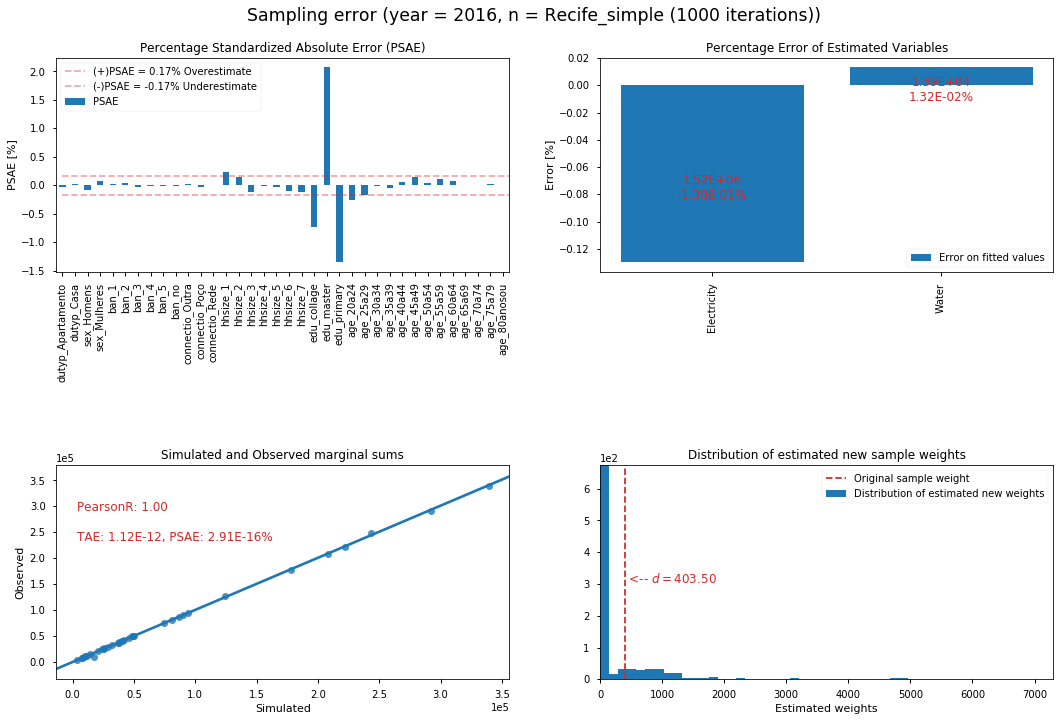

In [10]:
REC = plot_error(
    'data/survey_Recife_simple.csv',
    'data/benchmarks_br_rec_year_bias.csv',
    'Recife_simple (1000 iterations)',
    year = 2016,
    skip = ['e_sqm'],
    fit_cols = ['Electricity', 'Water'],
)

In [12]:
import pandas as pd
survey = pd.read_csv('data/survey_Recife_simple.csv', index_col=0)

In [22]:
iss = survey.shape[0]
rss = survey.loc[survey.wf > 0].shape[0]
print("""
The valid synthetic sample size is small! 
Initial sample size: {:0.0f}, representative sample size: {:0.0f}""".format(iss, rss))
print("Only {:0.2%} of the synthetic sample is valid for this population".format(rss/iss))


The valid synthetic sample size is small! 
Initial sample size: 956, representative sample size: 307
Only 32.11% of the synthetic sample is valid for this population


## 5. Define transition scenarios

In [1]:
from smum.microsim.run import transition_rate
from smum.microsim.util_plot import plot_transition_rate
from smum.microsim.run import reduce_consumption

/usr/lib/python3.6/site-packages/h5py-2.7.1-py3.6-linux-x86_64.egg/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
Elec  = transition_rate(0, 0.4, start=2016)
Water = transition_rate(0, 0.2, start=2016)
pr    = transition_rate(0, 0.3, start=2016)

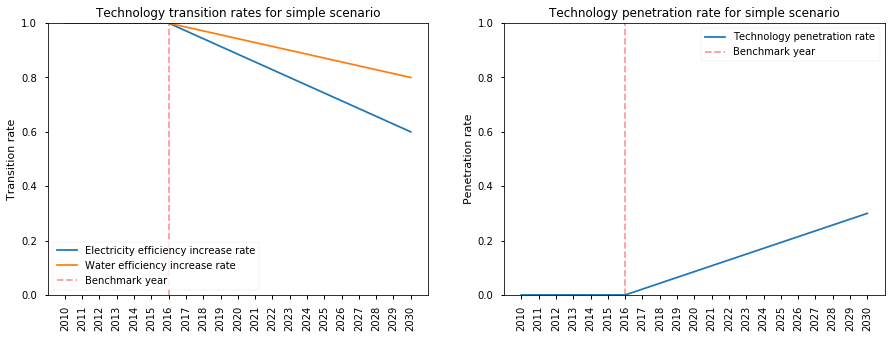

In [3]:
plot_transition_rate(
    {"Technology penetration rate": pr,
     "Electricity efficiency increase rate": Elec,
     "Water efficiency increase rate": Water},
     "simple scenario")

In [4]:
sampling_rules = {
    "e_edu == 'edu_master'": 30,
    "e_hhsize == 'hhsize_1'": 20,
    "e_hhsize == 'hhsize_2'": 10,
    "w_dutyp == 'dutyp_Casa'": 5,
}
file_name = "data/survey_Recife_simple.csv"
scenario_name="simple_scenario"
reduction = {'Electricity':Elec, 'Water':Water}

In [5]:
reduce_consumption(
    file_name, pr, sampling_rules, reduction, scenario_name=scenario_name)

00.00%   Electricity   reduction; efficiency 00.00%; penetration 00.00; year 2010
-0.00%      Water      reduction; efficiency 00.00%; penetration 00.00; year 2010
00.00%   Electricity   reduction; efficiency 00.00%; penetration 00.00; year 2011
-0.00%      Water      reduction; efficiency 00.00%; penetration 00.00; year 2011
00.00%   Electricity   reduction; efficiency 00.00%; penetration 00.00; year 2012
-0.00%      Water      reduction; efficiency 00.00%; penetration 00.00; year 2012
-0.00%   Electricity   reduction; efficiency 00.00%; penetration 00.00; year 2013
00.00%      Water      reduction; efficiency 00.00%; penetration 00.00; year 2013
00.00%   Electricity   reduction; efficiency 00.00%; penetration 00.00; year 2014
00.00%      Water      reduction; efficiency 00.00%; penetration 00.00; year 2014
00.00%   Electricity   reduction; efficiency 00.00%; penetration 00.00; year 2015
-0.00%      Water      reduction; efficiency 00.00%; penetration 00.00; year 2015
-0.00%   Electri

## 6. Visualize transition scenarios

In [6]:
from smum.microsim.util_plot import plot_data_projection

In [7]:
iterations = 1000
typ = 'reweighted'
reweighted_survey = 'data/survey_Recife_simple'

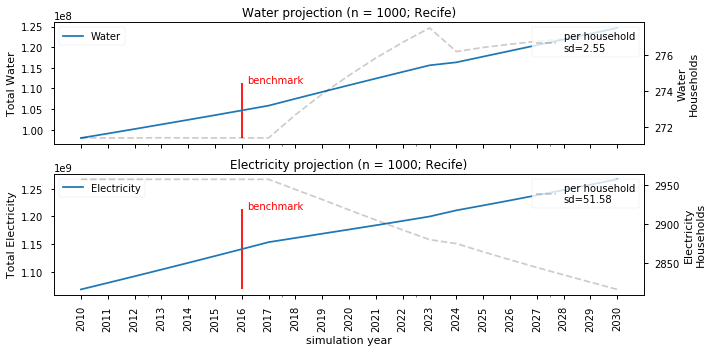

In [9]:
var = ['Water', 'Electricity']
data, cap = plot_data_projection(
    reweighted_survey, var, "{}; Recife".format(iterations),
    benchmark_year=2016,
)